In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras_tuner
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
leakage_dataset_train_100 = pd.read_csv(r"D:\Class\FPDS\FPDS_Final\Leakage Detection\leakage_dataset_train_100.csv")
leakage_dataset_train_1000 = pd.read_csv(r"D:\Class\FPDS\FPDS_Final\Leakage Detection\leakage_dataset_train_1000.csv")
leakage_dataset_validation_1000 = pd.read_csv(r"D:\Class\FPDS\FPDS_Final\Leakage Detection\leakage_dataset_validation_1000.csv")

In [4]:
X_train_100 = leakage_dataset_train_100[['mfc1', 'mfc2', 'mfc3', 'mfc4']].to_numpy()
Y_train_100 = leakage_dataset_train_100[['y1', 'y2']].to_numpy()
X_train_1000 = leakage_dataset_train_1000[['mfc1', 'mfc2', 'mfc3', 'mfc4']].to_numpy()
Y_train_1000 = leakage_dataset_train_1000[['y1', 'y2']].to_numpy()

In [5]:
X_validation = leakage_dataset_validation_1000[['mfc1', 'mfc2', 'mfc3', 'mfc4']].to_numpy()
Y_validation = leakage_dataset_validation_1000[['y1', 'y2']].to_numpy()

100 Training Data

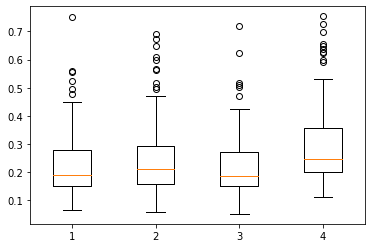

In [6]:
%matplotlib inline
B_100 = plt.boxplot(X_train_100)
plt.show()

1000 Training Data

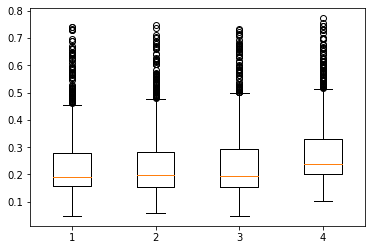

In [7]:
%matplotlib inline
B_1000 = plt.boxplot(X_train_1000)
plt.show()

Validation Data

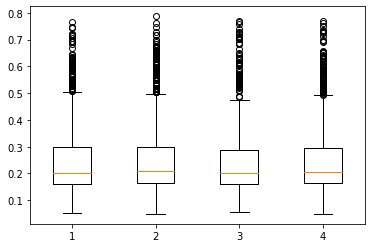

In [8]:
%matplotlib inline
B1 = plt.boxplot(X_validation)
plt.show()

In [9]:
list_whisker_100 = [item.get_ydata() for item in B_100['whiskers']]
list_whisker_1000 = [item.get_ydata() for item in B_1000['whiskers']]

In [10]:
list_whisker_val = [item.get_ydata() for item in B1['whiskers']]
list_whisker_val

[array([0.16234618, 0.05349716]),
 array([0.2993559 , 0.50403049]),
 array([0.16344416, 0.04891348]),
 array([0.29840857, 0.49760057]),
 array([0.16077478, 0.05659426]),
 array([0.28779415, 0.47630593]),
 array([0.16270096, 0.04941728]),
 array([0.29547214, 0.49441948])]

In [11]:
diff1_100 = list_whisker_100[-2][1] - list_whisker_val[-2][1]
diff2_100 = list_whisker_100[-1][1] - list_whisker_val[-1][1]
diff_100 = (diff1_100+diff2_100)/2
diff_100

0.049464080536921334

In [12]:
diff1_1000 = list_whisker_1000[-2][1] - list_whisker_val[-2][1]
diff2_1000 = list_whisker_1000[-1][1] - list_whisker_val[-1][1]
diff_1000 = (diff1_1000+diff2_1000)/2
diff_1000

0.03721770183359886

In [13]:
X_train_100[:,-1] = X_train_100[:,-1] - diff_100
X_train_100[:,:-1] = X_train_100[:,:-1] + diff_100/3

In [14]:
X_train_1000[:,-1] = X_train_1000[:,-1] - diff_1000
X_train_1000[:,:-1] = X_train_1000[:,:-1] + diff_1000/3

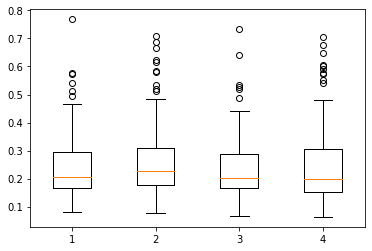

[array([0.16752921, 0.08082586]),
 array([0.29602357, 0.46688912]),
 array([0.17575852, 0.07600533]),
 array([0.30909733, 0.48529949]),
 array([0.16726091, 0.06771229]),
 array([0.28902419, 0.44195381]),
 array([0.15093145, 0.06293813]),
 array([0.30708461, 0.48089863])]

In [15]:
%matplotlib inline
B2_100 = plt.boxplot(X_train_100)
plt.show()
list_whisker_100_new = [item.get_ydata() for item in B2_100['whiskers']]
list_whisker_100_new

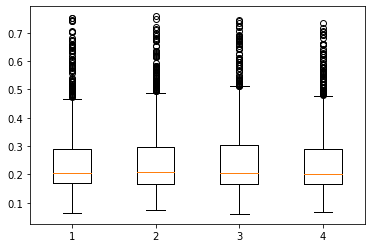

[array([0.16827194, 0.06186124]),
 array([0.28926838, 0.46653904]),
 array([0.16743962, 0.07285993]),
 array([0.29609926, 0.48693874]),
 array([0.16778484, 0.06038722]),
 array([0.30551592, 0.51107993]),
 array([0.1661108 , 0.06705603]),
 array([0.29130653, 0.47678073])]

In [16]:
%matplotlib inline
B2_1000 = plt.boxplot(X_train_1000)
plt.show()
list_whisker_1000_new = [item.get_ydata() for item in B2_1000['whiskers']]
list_whisker_1000_new

Implementing rotation via linear matrix operator

In [17]:
def rotate90(x, y):
    x_new = tf.gather(x, [3,0,1,2])
    rotation_matrix = np.array([[0, -1], [1, 0]])
    y_new = tf.squeeze(tf.matmul(tf.reshape(y, (1,2)), rotation_matrix))
    return x_new, y_new

def rotate180(x, y):
    x_new = tf.gather(x, [2,3,0,1])
    rotation_matrix = np.array([[-1, 0], [0, -1]])
    y_new = tf.squeeze(tf.matmul(tf.reshape(y, (1,2)), rotation_matrix))
    return x_new, y_new

def rotate270(x, y):
    x_new = tf.gather(x, [1,2,3,0])
    rotation_matrix = np.array([[0, 1], [-1, 0]])
    y_new = tf.squeeze(tf.matmul(tf.reshape(y, (1,2)), rotation_matrix))
    return x_new, y_new

def flip(x, y):
    x_new = tf.gather(x, [1,0,3,2])
    y_new = [y[0], -1*y[1]]
    return x_new, y_new

def flip90(x, y):
    x_flipped, y_flipped = flip(x, y)
    x_rotated, y_rotated = rotate90(x_flipped, y_flipped)
    return x_rotated, y_rotated

def flip180(x, y):
    x_flipped, y_flipped = flip(x, y)
    x_rotated, y_rotated = rotate180(x_flipped, y_flipped)
    return x_rotated, y_rotated

def flip270(x, y):
    x_flipped, y_flipped = flip(x, y)
    x_rotated, y_rotated = rotate270(x_flipped, y_flipped)
    return x_rotated, y_rotated

In [18]:
dataset100 = tf.data.Dataset.from_tensor_slices((X_train_100, Y_train_100))
dataset100_augmented = dataset100
for augmentation in (rotate90, rotate180, rotate270, flip, flip90, flip180, flip270):
    dataset_temp = dataset100.map(augmentation)
    dataset100_augmented = dataset100_augmented.concatenate(dataset_temp)

In [19]:
dataset1000 = tf.data.Dataset.from_tensor_slices((X_train_1000, Y_train_1000))
dataset1000_augmented = dataset1000
for augmentation in (rotate90, rotate180, rotate270, flip, flip90, flip180, flip270):
    dataset_temp = dataset1000.map(augmentation)
    dataset1000_augmented = dataset1000_augmented.concatenate(dataset_temp)

In [20]:
dataset100_augmented.cardinality().numpy()

800

In [21]:
dataset1000_augmented.cardinality().numpy()

8000

In [22]:
X_train_augmented_100 = np.asarray([ x[0] for x in list(dataset100.as_numpy_iterator())])
Y_train_augmented_100 = np.asarray([ x[1] for x in list(dataset100.as_numpy_iterator())])
X_train_augmented_1000 = np.asarray([ x[0] for x in list(dataset1000.as_numpy_iterator())])
Y_train_augmented_1000 = np.asarray([ x[1] for x in list(dataset1000.as_numpy_iterator())])

In [23]:
model_standard_100 = tf.keras.models.load_model(r'D:\Class\FPDS\FPDS_Final\Model\model_standard_[100].h5')

In [24]:
model_standard_100.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_standard_1000 = tf.keras.models.load_model(r'D:\Class\FPDS\FPDS_Final\Model\model_standard_[1000].h5')
model_standard_1000.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_standard_agumented_100 = tf.keras.models.load_model(r'D:\Class\FPDS\FPDS_Final\Model\model_standard_augmented_[100].h5')
model_standard_100.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________


For normailized data: val_loss: 0.0088 - val_mean_absolute_error: 0.0751
For agumented Data(100): val_loss: 0.0084 - val_mean_absolute_error: 0.0728

In [28]:
model_standard_agumented_1000 = tf.keras.models.load_model(r'D:\Class\FPDS\FPDS_Final\Model\model_standard_augmented_[1000].h5')
model_standard_1000.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
custom_objects = {
    "HiddenLayer": HiddenLayer,
    "OutputLayer": OutputLayer,
}
model_equivariant_100 = tf.keras.models.load_model(r'D:\Class\FPDS\FPDS_Final\Model\model_equivariant_100.h5',custom_objects=custom_objects)

NameError: name 'HiddenLayer' is not defined